In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

tf.random.set_seed(42)

# * Встановлення параметрів генератора даних
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# * Шляхи до папок із даними
train_folder = "./train"
test_folder = "./test"

train_generator = train_datagen.flow_from_directory(
    train_folder,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical",
    seed=42
)

test_generator = valid_datagen.flow_from_directory(
    test_folder,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical",
    seed=42
)


Found 2244 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# * Створення моделі CNN
model = Sequential()

# * Шар згортки і шар пулінгу
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

# * Додаткові шари згортки та пулінгу для поліпшення виділення ознак
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# * Згладжування перед подаванням у повнозв'язні шари
model.add(Flatten())

# * Повнозв'язні шари
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# * Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# * Тренування моделі
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# * Оцінювання моделі на тренувальному наборі
train_loss, train_accuracy = model.evaluate(train_generator)

print(f'Втрати на тренувальному наборі: {train_loss}')
print(f'Точність на тренувальному наборі: {train_accuracy}')

Epoch 1/10
71/71 [==============================] - 95s 1s/step - loss: 1.0463 - accuracy: 0.5321 - val_loss: 0.7414 - val_accuracy: 0.6960
Epoch 2/10
71/71 [==============================] - 87s 1s/step - loss: 0.7616 - accuracy: 0.6791 - val_loss: 0.7321 - val_accuracy: 0.6960
Epoch 3/10
71/71 [==============================] - 87s 1s/step - loss: 0.6718 - accuracy: 0.7086 - val_loss: 0.7124 - val_accuracy: 0.7213
Epoch 4/10
71/71 [==============================] - 87s 1s/step - loss: 0.5706 - accuracy: 0.7531 - val_loss: 0.7224 - val_accuracy: 0.7000
Epoch 5/10
71/71 [==============================] - 87s 1s/step - loss: 0.4413 - accuracy: 0.8235 - val_loss: 0.6962 - val_accuracy: 0.7467
Epoch 6/10
71/71 [==============================] - 87s 1s/step - loss: 0.3078 - accuracy: 0.8761 - val_loss: 0.8260 - val_accuracy: 0.7160
Epoch 7/10
71/71 [==============================] - 87s 1s/step - loss: 0.1620 - accuracy: 0.9412 - val_loss: 1.0789 - val_accuracy: 0.6947
Epoch 8/10
71/71 [==

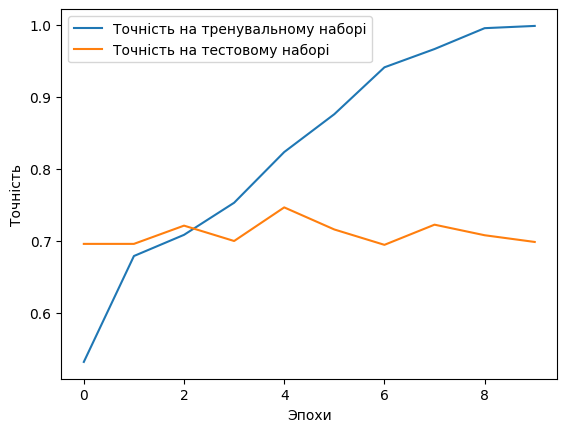

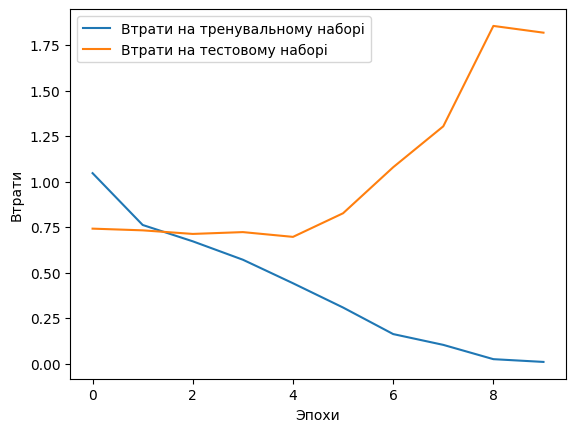

In [4]:
import matplotlib.pyplot as plt

# * Графік точності
plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на тестовому наборі')
plt.xlabel('Эпохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

# * Графік втрат
plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрати на тестовому наборі')
plt.xlabel('Эпохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

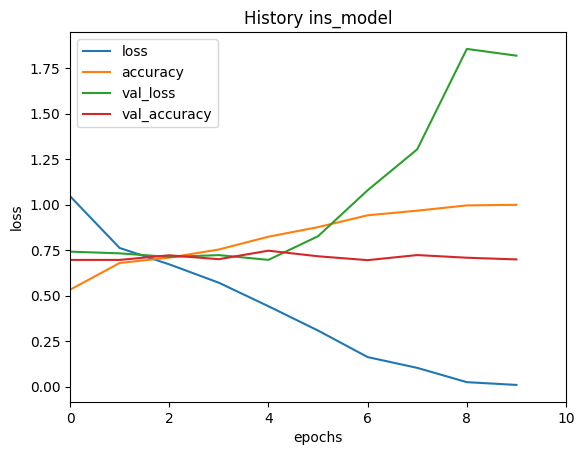

In [6]:
import pandas as pd
pd.DataFrame(history.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,10))